In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations
from warnings import filterwarnings
from IPython.display import clear_output
filterwarnings("ignore")

In [83]:
data= np.random.rand(100,2)
cities = ["city" + str(x) for x in range(len(data))]


## GENETIC ALgorithm

In [84]:
def generate_gene(cities):
    return list(np.random.permutation(cities))
def generate_pop(n_pop,cities):
    return [generate_gene(cities) for _ in range(n_pop)]
def calc_fitness(gene):
    global distances
    dist =0
    for x in range(len(gene)-1):
        dist+= distances[(gene[x],gene[x+1])]
    return 1/dist
def crossover(a,b):
    p = np.random.randint(0,len(a))
    child = a[:p]
    for x in b:
        if x not in child:
            child.append(x)
    return child
def mutate(route):
    n = np.zeros_like(route)
    a,b = np.random.choice(range(len(route)) ,replace  = False,size=2)
    temp = route[min(a,b)]
    route[min(a,b)] = route[max(a,b)]
    for x in range(min(a,b)+1,max(a,b)+1):
        temp, route[x] = route[x],temp
    return route
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)
def selection(routes):
    fitness = [calc_fitness(x) for x in routes]
    routes = sorted(routes,key = lambda x : fitness[routes.index(x)],reverse = True)
#     fitness = sorted(fitness,reverse = True)
    fitness = sorted(np.power(fitness,-2),reverse = True)
#     routes = routes[:int(len(routes)*.5)]
#     fitness = fitness[:int(len(fitness)*.5)]
    routes = routes[:int(len(routes))]
    fitness = fitness[:int(len(fitness))]
    selection_proba = softmax(fitness)
    i,j = np.random.choice(range(len(routes)),size = 2,replace=False,p=selection_proba)
    return routes[i],routes[j]

In [85]:
def plot_path(gene,gene1,data,cities,d,d1):
    plt.figure(figsize=(16,6))
    plt.subplot(1,2,1)
    plt.scatter(data[:,0],data[:,1])
    plt.axis(False)
    for i  in range(len(gene)-1):
        cord1,cord2 = data[cities.index(gene[i])],data[cities.index(gene[i+1])]
        plt.annotate(gene[i], (cord1[0], cord1[1]))
        plt.plot((cord1[0],cord2[0]),(cord1[1],cord2[1]))
    plt.annotate(gene[i+1], (cord2[0], cord2[1]))
    plt.title(d)
    plt.subplot(1,2,2)
    plt.scatter(data[:,0],data[:,1])
    plt.axis(False)
    for i  in range(len(gene1)-1):
        cord1,cord2 = data[cities.index(gene1[i])],data[cities.index(gene1[i+1])]
        plt.annotate(gene1[i], (cord1[0], cord1[1]))
        plt.plot((cord1[0],cord2[0]),(cord1[1],cord2[1]))
    plt.annotate(gene1[i+1], (cord2[0], cord2[1]))
    plt.title(d1)
    plt.plot()
    plt.show()
    

In [101]:
cities_permu = permutations(cities,2)
global distances
distances = {}
for x in cities_permu:
    distances[x] = np.sqrt(np.sum(np.square(data[cities.index(x[0])] - data[cities.index(x[1])])))
n_pop = 100
mutate_rate = 0.4  

In [104]:
%%time
from tqdm.notebook import tqdm
pop = generate_pop(n_pop,cities)
best_score = calc_fitness(pop[0])
best_route = pop[0]
scores = []
for x in tqdm(range(500)):
    new_pop = []
    for _ in range(n_pop):
        a,b = selection(pop)
        child = crossover(a,b)
        if np.random.random()<= mutate_rate:
            child = mutate(child)
        new_pop.append(child)
    pop = new_pop
    fitness = [calc_fitness(x) for x in pop]
    max_fit = np.argmax(fitness)
    scores.append(1/fitness[max_fit])
    if fitness[max_fit] > best_score:
        best_score = fitness[max_fit]
        best_route = pop[max_fit]
#     clear_output(wait=True)
#     plot_path(best_route,pop[max_fit],data,cities,round(1/best_score,3),round(1/fitness[max_fit] ,3))

  0%|          | 0/500 [00:00<?, ?it/s]

CPU times: user 2min 8s, sys: 341 ms, total: 2min 9s
Wall time: 2min 8s


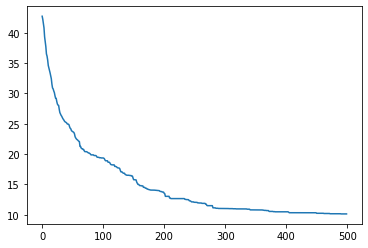

In [103]:
plt.plot(range(len(scores)) ,scores)

## ANT Colony Optimization


USed Library - https://pypi.org/project/sko/

In [90]:
num_points = len(data)
points_coordinate = data
# points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')

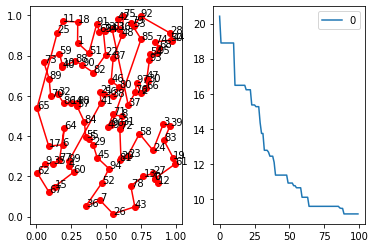

In [91]:
from __future__ import division
import numpy as np
from scipy import spatial
import pandas as pd
import matplotlib.pyplot as plt
from sko.ACA import ACA_TSP




def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])


def main():
    aca = ACA_TSP(func=cal_total_distance, n_dim=num_points,
                  size_pop=3, max_iter=100,
                  distance_matrix=distance_matrix)
    best_x, best_y = aca.run()
    # Plot the result
    fig, ax = plt.subplots(1, 2)
    best_points_ = np.concatenate([best_x, [best_x[0]]])
    best_points_coordinate = points_coordinate[best_points_, :]
    for index in range(0, len(best_points_)):
        ax[0].annotate(best_points_[index], (best_points_coordinate[index, 0], best_points_coordinate[index, 1]))
    ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
    pd.DataFrame(aca.y_best_history).cummin().plot(ax=ax[1])
    plt.show()


if __name__ == "__main__":
    main()

In [92]:
from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

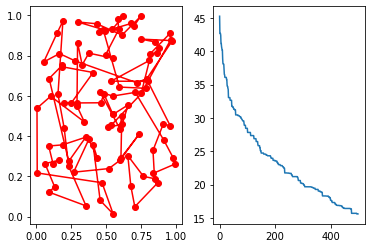

In [93]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()